In [1]:
import numpy as np
import pandas as pd
import os


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
df = pd.read_excel('/content/gdrive/MyDrive/Ciencia de Datos/Taller 2/Data_Taller_2.xlsx')
df.head()

,instant,Date,Year,Month,Day,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
0,1.0,2020-01-01,2020.0,1.0,1.0,Springer,No,Mist + Cloudy,8175849.0,9.090375e+06,0.805833,10749882.0,331.0,654.0,985.0
1,2.0,2020-01-02,2020.0,1.0,2.0,Springer,No,Mist + Cloudy,9083466.0,8.625733e+06,0.696087,-16652113.0,131.0,670.0,801.0
2,3.0,2020-01-03,2020.0,1.0,3.0,Springer,No,Few clouds,1229108.0,9.020350e-01,0.437273,16636703.0,120.0,1229.0,1349.0
3,4.0,2020-01-04,2020.0,1.0,4.0,Springer,No,Few clouds,1.4,1.969734e+06,0.590435,10739832.0,108.0,1454.0,1562.0
4,5.0,2020-01-05,2020.0,1.0,5.0,Springer,No,Partly cloudy,2666979.0,2.775690e+05,0.436957,125223.0,82.0,1518.0,1600.0


In [5]:
df.describe()

,instant,Year,Month,Day,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
count,730.000000,730.000000,730.000000,730.000000,7.260000e+02,7.300000e+02,730.000000,7.300000e+02,730.000000,730.000000,730.000000
mean,365.919178,2020.500000,6.526027,15.720548,3.601389e+05,4.888048e+05,0.682446,1.839109e+06,849.249315,3658.757534,4508.006849
std,211.299280,0.500343,3.450215,8.802278,3.401804e+06,3.017135e+06,0.751180,5.890488e+06,686.479875,1559.758728,1936.011647
min,1.000000,2020.000000,1.000000,1.000000,-5.220871e+07,-4.283729e+07,0.000000,-1.665211e+07,2.000000,20.000000,22.000000
25%,183.250000,2020.000000,4.000000,8.000000,1.013415e+01,1.036619e+01,0.522187,9.218865e+00,316.250000,2502.250000,3169.750000
50%,365.500000,2020.500000,7.000000,16.000000,1.851585e+01,1.757759e+01,0.628333,1.266732e+01,717.000000,3664.500000,4548.500000
75%,548.750000,2021.000000,10.000000,23.000000,2.551686e+01,2.307428e+01,0.732187,1.830216e+01,1096.500000,4783.250000,5966.000000
max,731.000000,2021.000000,12.000000,31.000000,1.894665e+07,1.751766e+07,10.867083,6.000868e+07,3410.000000,6946.000000,8714.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    float64       
 1   Date        730 non-null    datetime64[ns]
 2   Year        730 non-null    float64       
 3   Month       730 non-null    float64       
 4   Day         730 non-null    float64       
 5   Season      730 non-null    object        
 6   Holiday     730 non-null    object        
 7   Weather     730 non-null    object        
 8   Temp        726 non-null    float64       
 9   Feel_Temp   730 non-null    float64       
 10  Hum         730 non-null    float64       
 11  Wind        730 non-null    float64       
 12  Casual      730 non-null    float64       
 13  Registered  730 non-null    float64       
 14  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), float64(11), object(3)
memory usage: 85.7+ KB


In [7]:
df.apply(lambda x: len(x.unique()))

instant       730
Date          730
Year            2
Month          12
Day            31
Season          4
Holiday         2
Weather        11
Temp          516
Feel_Temp     695
Hum           595
Wind          659
Casual        605
Registered    678
cnt           695
dtype: int64

In [8]:
df.isnull()

,instant,Date,Year,Month,Day,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna()

,instant,Date,Year,Month,Day,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
show =pd.isnull(df).sum()
show


instant       0
Date          0
Year          0
Month         0
Day           0
Season        0
Holiday       0
Weather       0
Temp          4
Feel_Temp     0
Hum           0
Wind          0
Casual        0
Registered    0
cnt           0
dtype: int64

In [11]:
df.isnull().sum().any()

True

In [12]:
cols = ['Season','Holiday','Weather']
for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    float64       
 1   Date        730 non-null    datetime64[ns]
 2   Year        730 non-null    float64       
 3   Month       730 non-null    float64       
 4   Day         730 non-null    float64       
 5   Season      730 non-null    category      
 6   Holiday     730 non-null    category      
 7   Weather     730 non-null    category      
 8   Temp        726 non-null    float64       
 9   Feel_Temp   730 non-null    float64       
 10  Hum         730 non-null    float64       
 11  Wind        730 non-null    float64       
 12  Casual      730 non-null    float64       
 13  Registered  730 non-null    float64       
 14  cnt         730 non-null    float64       
dtypes: category(3), datetime64[ns](1), float64(11)
memory usage: 71.4 KB


In [13]:
df= df.drop(columns=['Date'], axis=1)

[Text(0.5, 1.0, 'Count of bikes during Day and Month')]

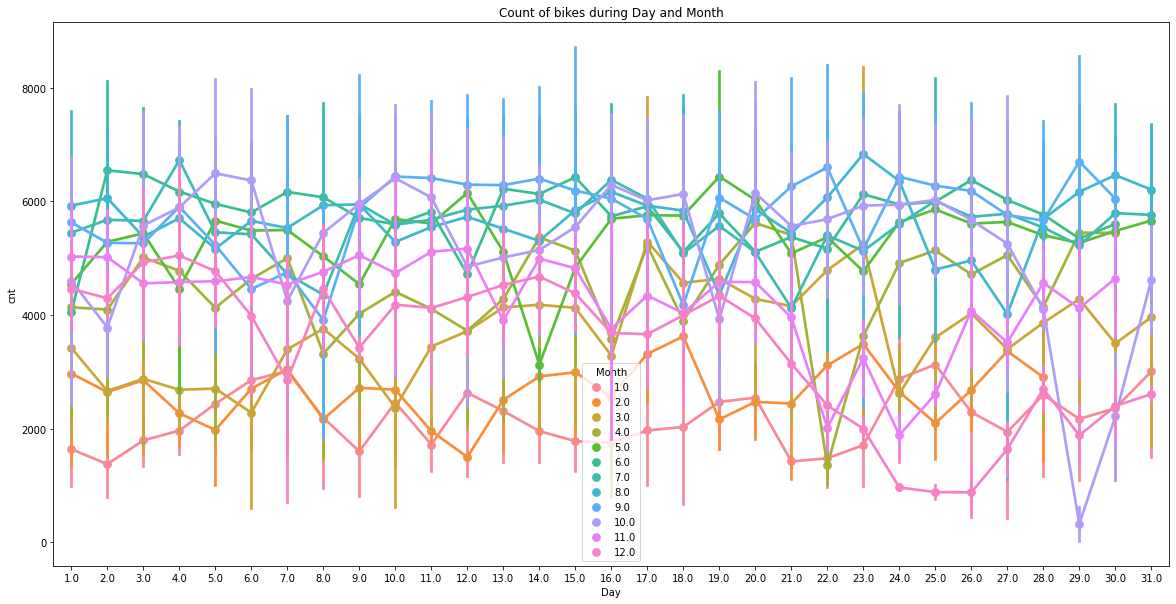

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='Day', y='cnt', hue='Month', ax=ax)
ax.set(title='Count of bikes during Day and Month')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

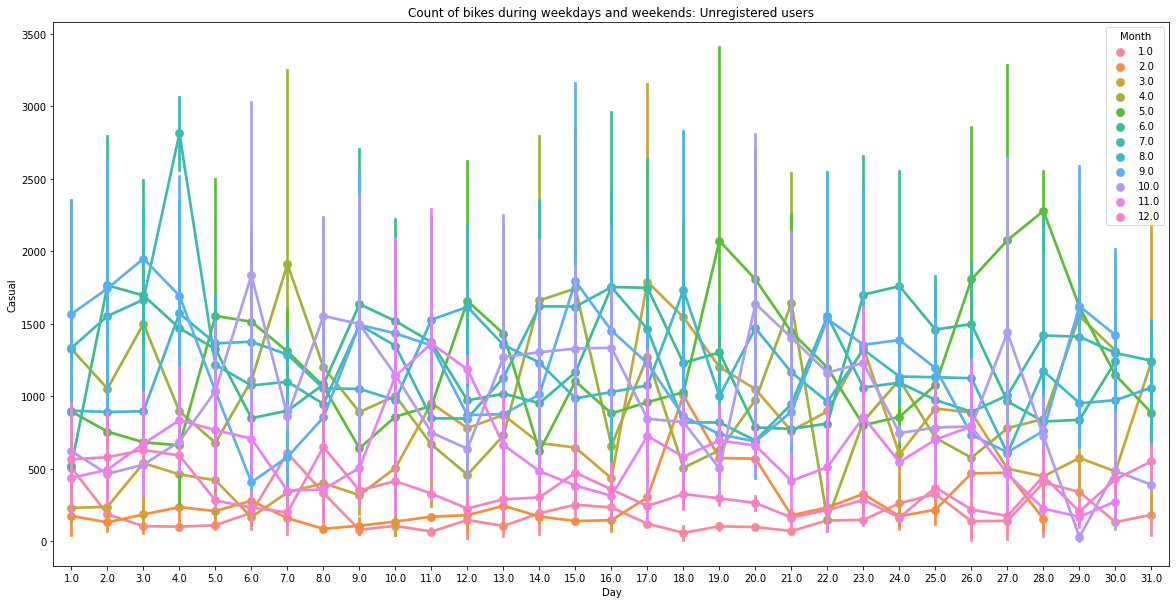

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='Day', y='Casual', hue='Month', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

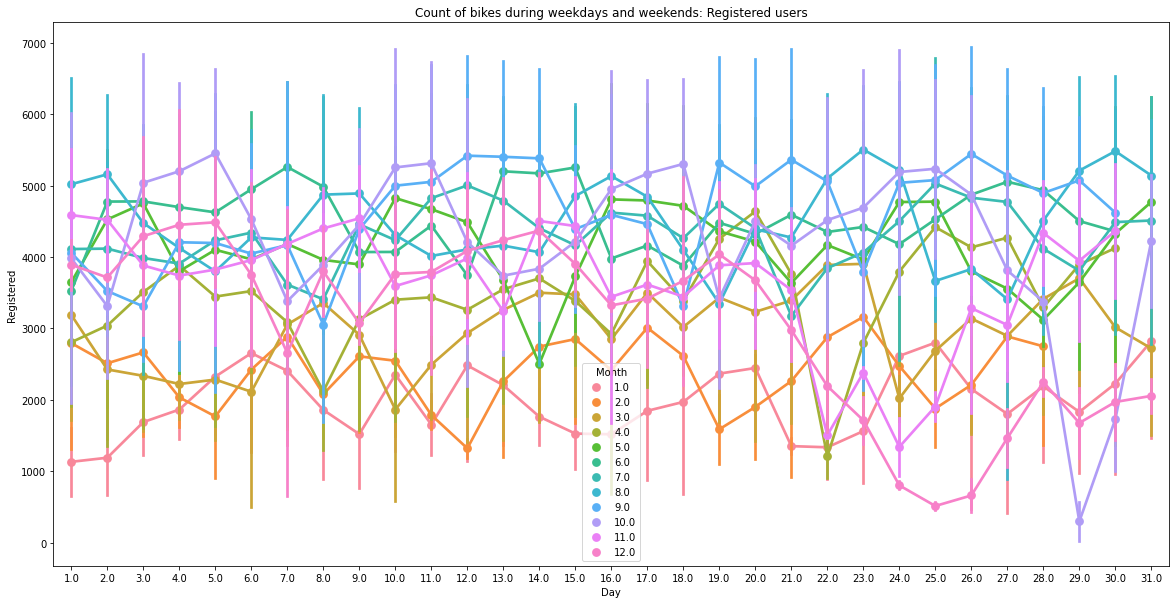

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='Day', y='Registered', hue='Month', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

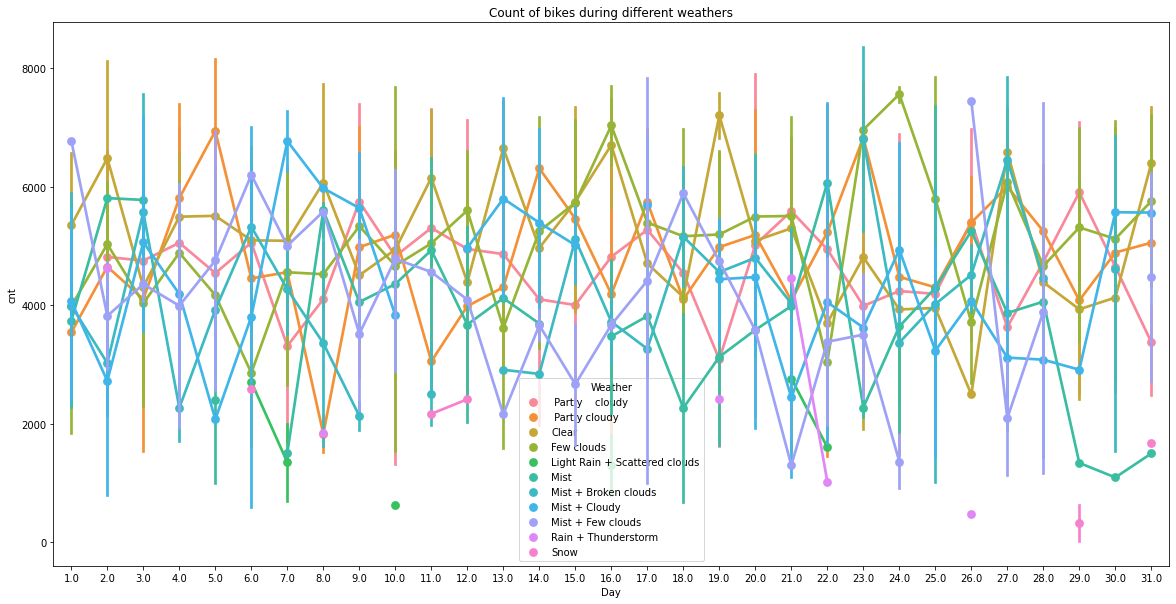

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='Day', y='cnt', hue='Weather', ax=ax)
ax.set(title='Count of bikes during different weathers')

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

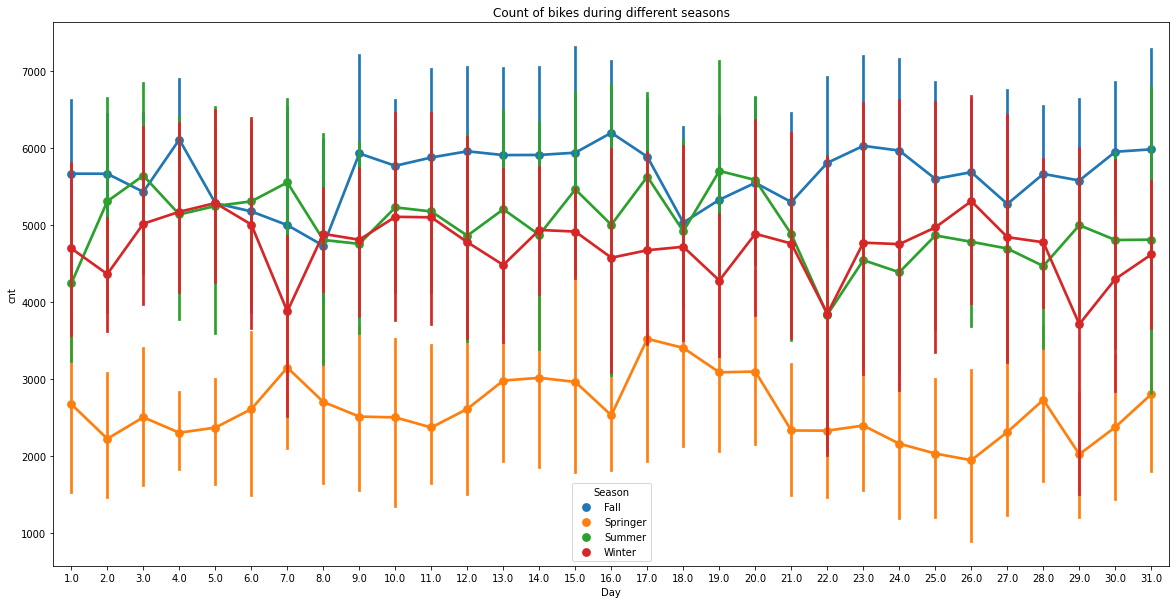

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='Day', y='cnt', hue='Season', ax=ax)
ax.set(title='Count of bikes during different seasons')

[Text(0.5, 1.0, 'Count of bikes during different months')]

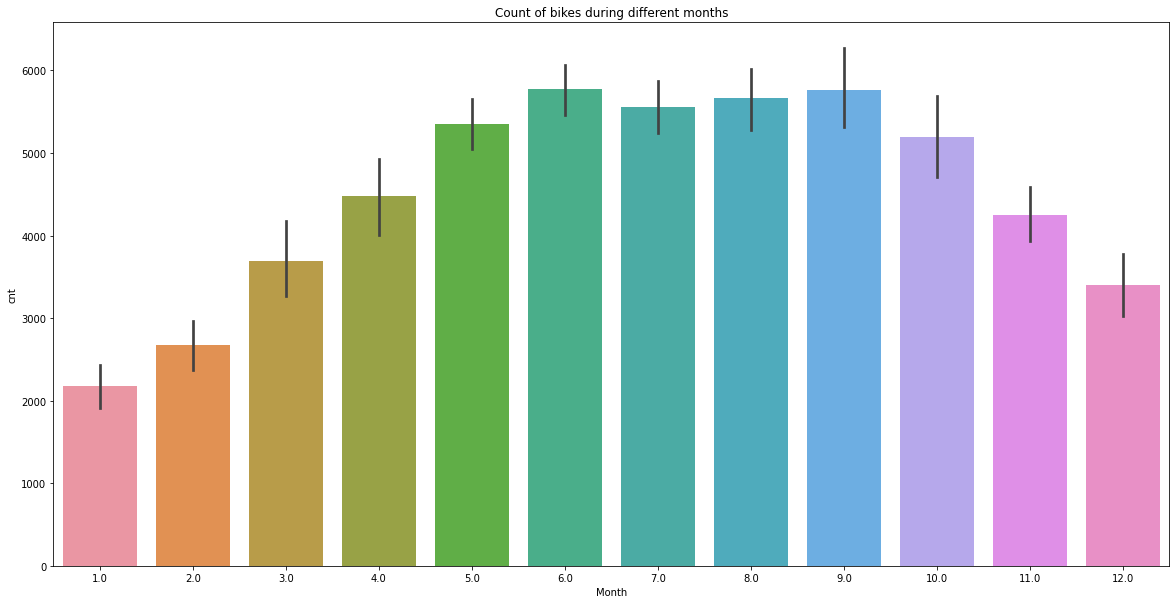

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='Month', y='cnt', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different days')]

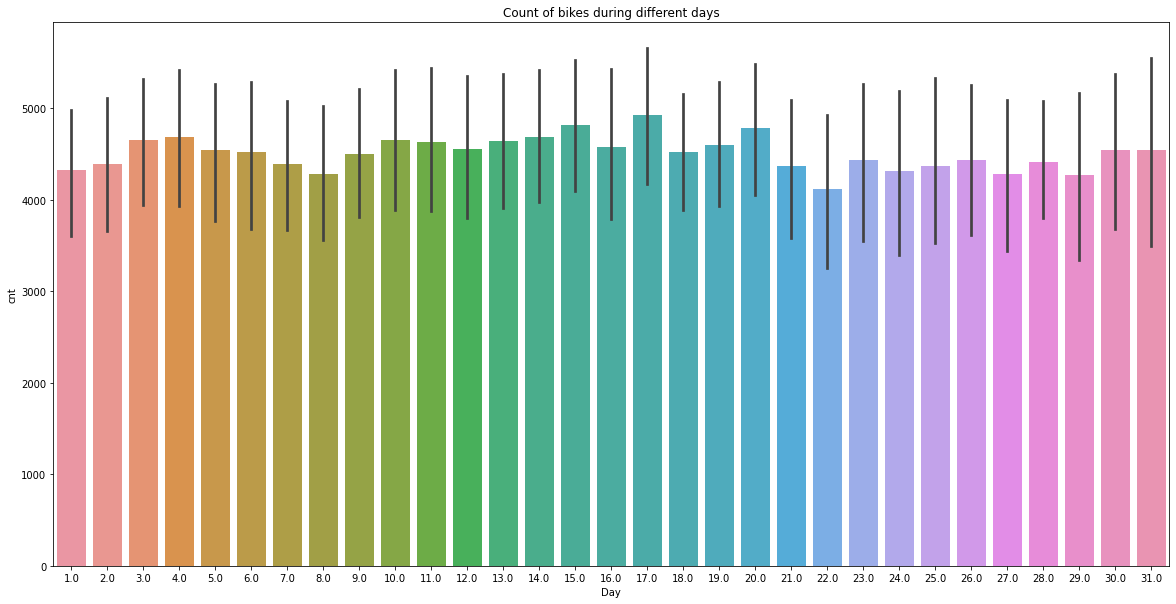

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='Day', y='cnt', ax=ax)
ax.set(title='Count of bikes during different days')

[Text(0.5, 1.0, 'Relation between humidity and users')]

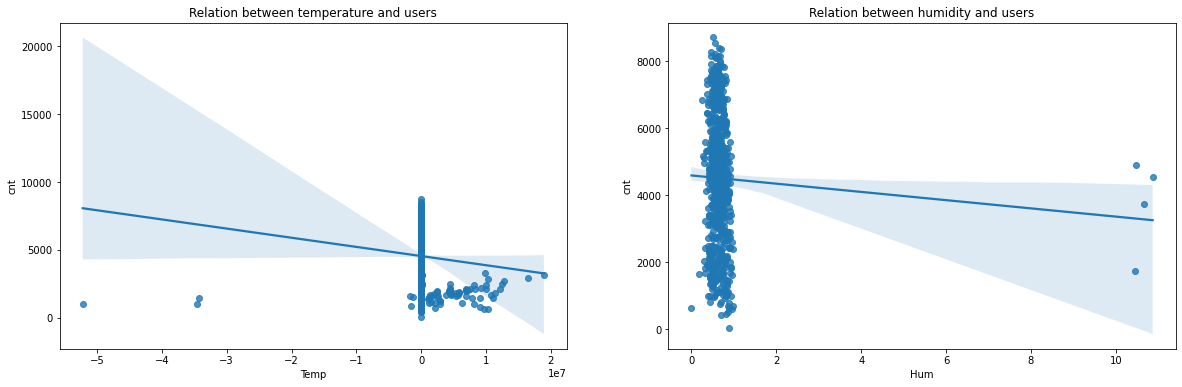

In [21]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['Temp'], y=df['cnt'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['Hum'], y=df['cnt'], ax=ax2)
ax2.set(title="Relation between humidity and users")

[Text(0.5, 1.0, 'Theoritical quantiles')]

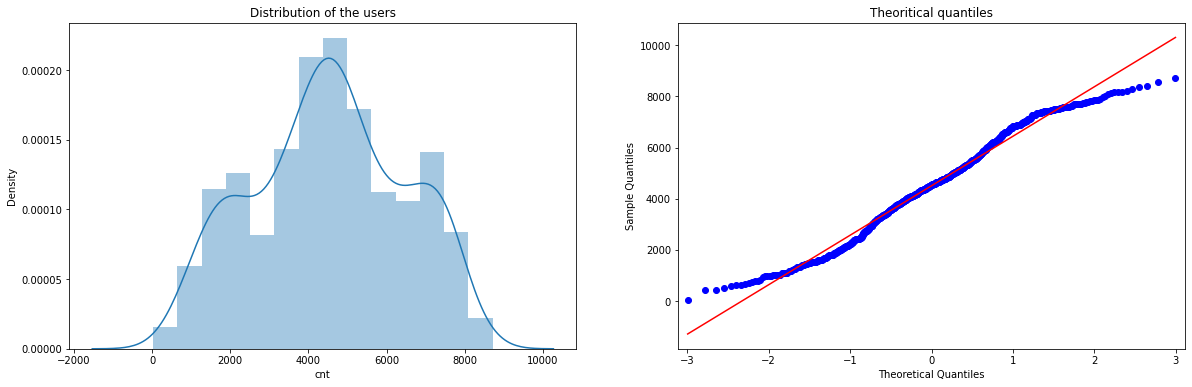

In [22]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['cnt'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['cnt'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

In [23]:
df['cnt'] = np.log(df['cnt'])

[Text(0.5, 1.0, 'Theoritical quantiles')]

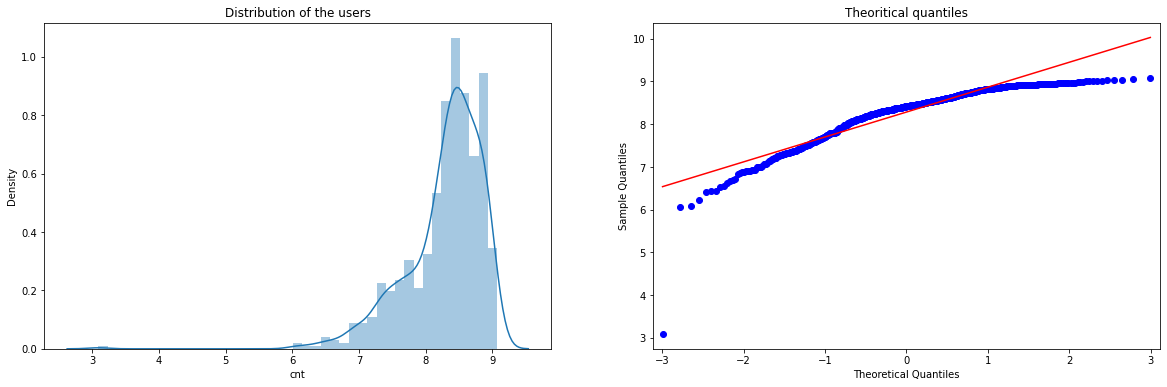

In [24]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['cnt'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['cnt'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

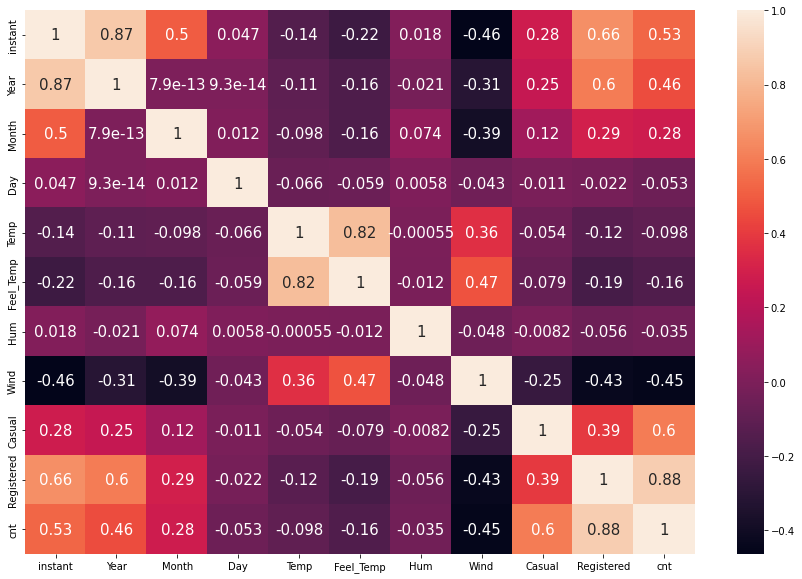

In [25]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

In [26]:
pd.get_dummies(df['Season'], prefix='Season', drop_first=True).head()

,Season_Springer,Season_Summer,Season_Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
